In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features=28*28

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].

x_train, x_test = x_train / 255., x_test / 255.

In [4]:
num_classes = 10
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [5]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [6]:
w=tf.Variable(tf.ones([num_features,num_classes]),name='weight')
b=tf.Variable(tf.zeros([num_classes]),name='bias')

In [7]:
print(x_train.shape)
print(y_train.shape)
print(w.shape)
print(b.shape)

(60000, 784)
(60000,)
(784, 10)
(10,)


### Defining Logistic Regression and Cost Function

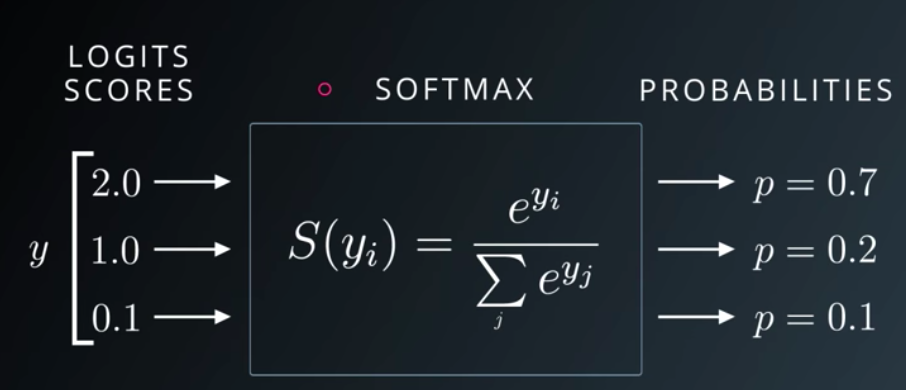

In [14]:
#Activation Function
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x,w)+b)

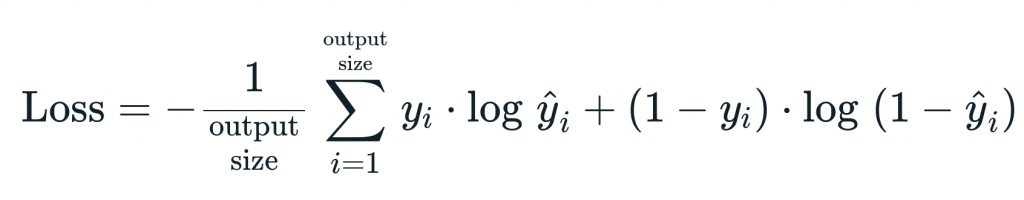

In [15]:
# Loss or Cost Function
def cross_entropy(y_pred,y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [16]:
# Optimizers
optimizer=tf.optimizers.SGD(learning_rate)

In [17]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        pred=logistic_regression(x)
        loss=cross_entropy(pred,y)
    gradients=g.gradient(loss,[w,b])
    optimizer.apply_gradients(zip(gradients,[w,b]))

In [18]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 736.383057, accuracy: 0.808594
step: 100, loss: 646.503845, accuracy: 0.800781
step: 150, loss: 462.267151, accuracy: 0.863281
step: 200, loss: 505.658844, accuracy: 0.867188
step: 250, loss: 508.587433, accuracy: 0.878906
step: 300, loss: 605.063049, accuracy: 0.839844
step: 350, loss: 583.957153, accuracy: 0.824219
step: 400, loss: 596.471313, accuracy: 0.847656
step: 450, loss: 769.185425, accuracy: 0.816406
step: 500, loss: 559.590576, accuracy: 0.855469
step: 550, loss: 584.774353, accuracy: 0.746094
step: 600, loss: 647.785950, accuracy: 0.816406
step: 650, loss: 617.403381, accuracy: 0.808594
step: 700, loss: 446.481750, accuracy: 0.871094
step: 750, loss: 582.709717, accuracy: 0.816406
step: 800, loss: 635.819214, accuracy: 0.835938
step: 850, loss: 410.791290, accuracy: 0.851562
step: 900, loss: 490.617432, accuracy: 0.859375
step: 950, loss: 693.544067, accuracy: 0.832031
step: 1000, loss: 473.905701, accuracy: 0.863281
